<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [ ]:
#insert your information
NAME = ''
STUDENT_NUMBER = ''

# Libraries

In [1]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [2]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [3]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS

In [1]:
def dfs(graph, start, goal):
    #TODO: implement DFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    return path, explored


# BFS

In [2]:
def bfs(graph, start, goal):
    #TODO: implement BFS search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    return path, explored


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

Your Answer:

# A star


In [7]:
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)
def manhattan_distance(a, b, pos):
    #TODO: implement manhattan distance
    return None
    
# Random heuristic
def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):
    #TODO: implement A* search
    #return the "path" which is a list of nodes in path and the "explored" which is list of nodes who are explored
    return path, explored


# Results

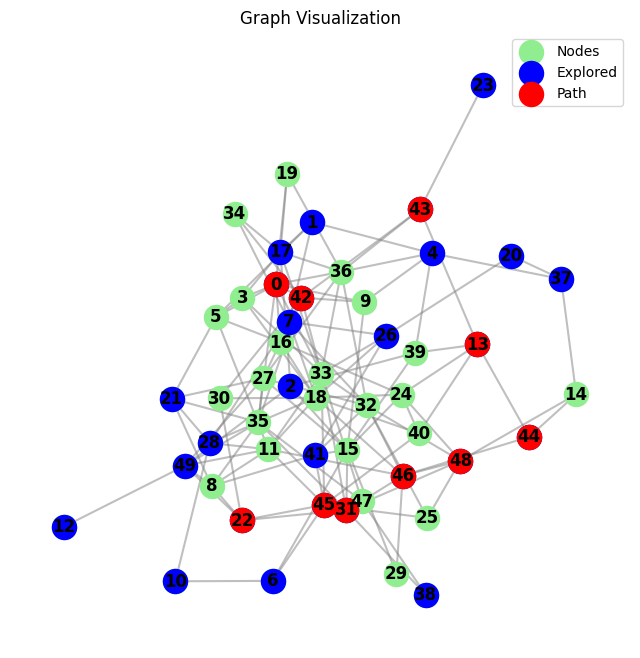

DFS Path: [0, 42, 43, 13, 44, 46, 48, 31, 22, 45]


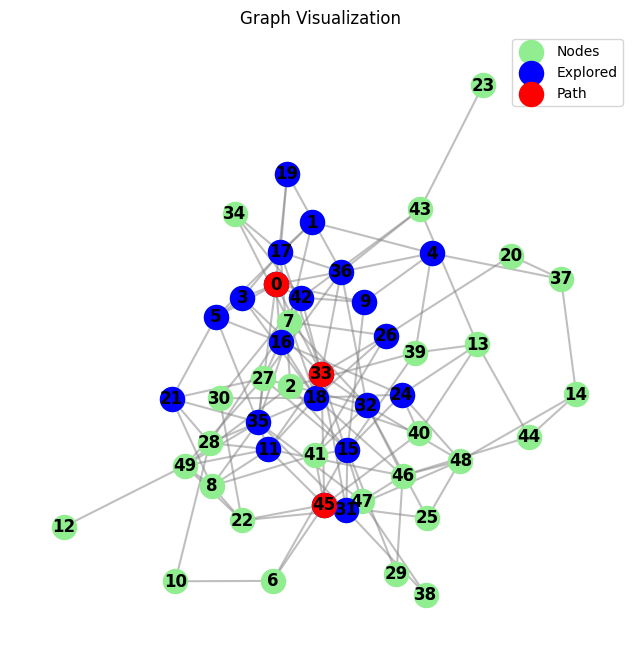

BFS Path: [0, 33, 45]


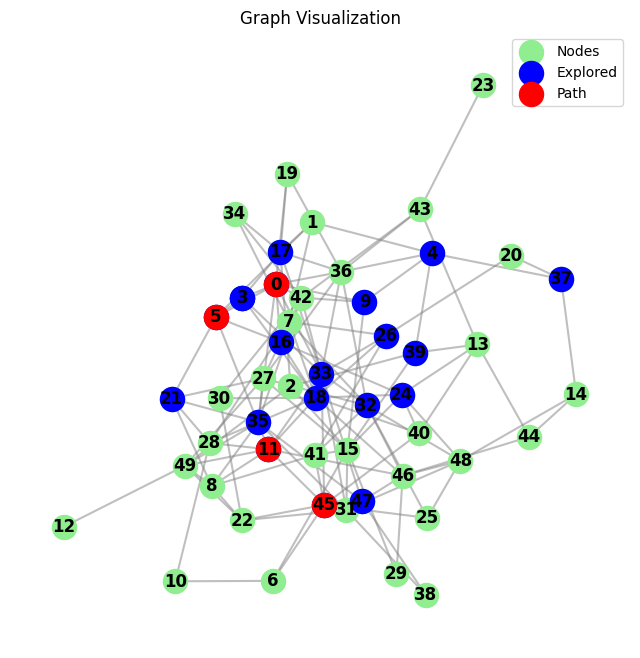

A* Path with Random Heuristic: [0, 5, 11, 45]


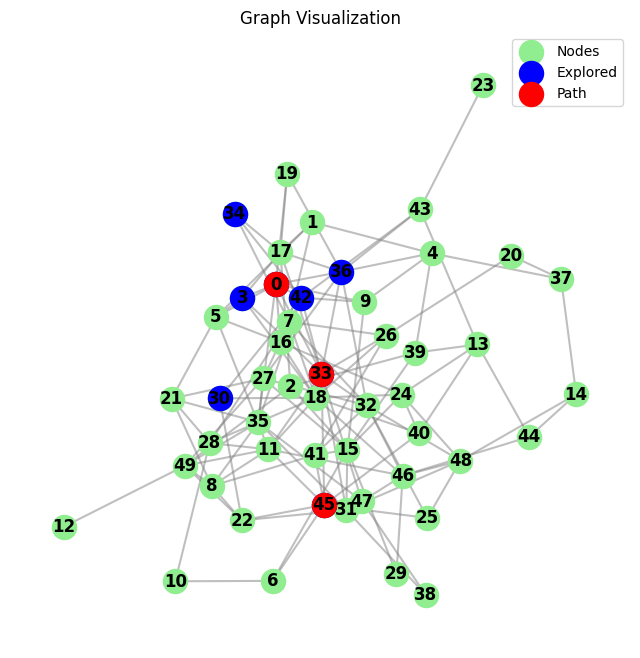

A* Path with Manhattan Distance Heuristic: [0, 33, 45]


In [9]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# # Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

Your Answer:

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [10]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [11]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [12]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    #TODO: implement DFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum
    return None


# BFS With Cost

In [13]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    #TODO: implement BFS search
    #returns the path(list) and weight_sum(int) and explored(list)
    #Reconstruct the path and calculate the weight sum
    return None
    

# Dijkstra (UCS)

In [5]:
# Dijkstra's Algorithm
def dijkstra(graph, start, goal):
    #TODO: implement Dijkstra search
    # returns the path(list) and weight_sum(int) and explored(list)
    # Reconstruct the path and calculate the weight sum
    
    # Priority queue to hold nodes to be explored, based on their tentative distance
    # If a shorter path to the neighbor is found, update the priority queue
    # Reconstruct the path and calculate the weight sum
    
    return None


# Results

DFS Path: [0, 45]
DFS Weight Sum: 5
BFS Path: [0, 29, 45]
BFS Weight Sum: 10
Dijkstra Path: [0, 45]
Dijkstra Weight Sum: 5


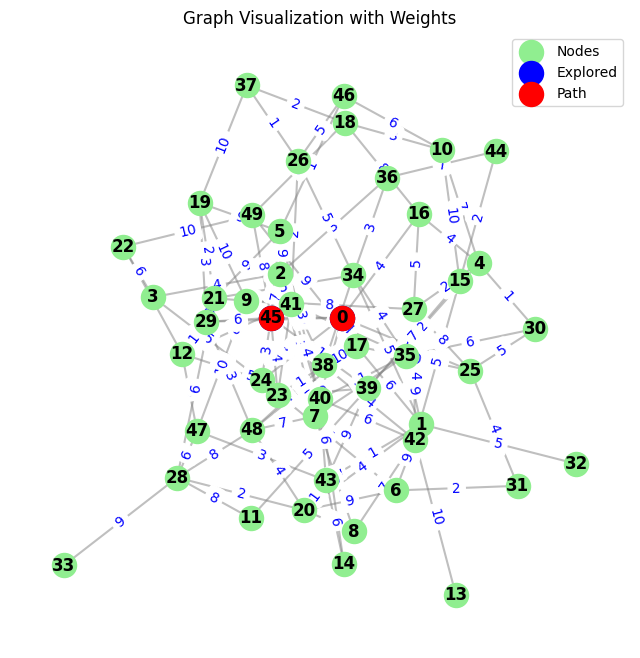

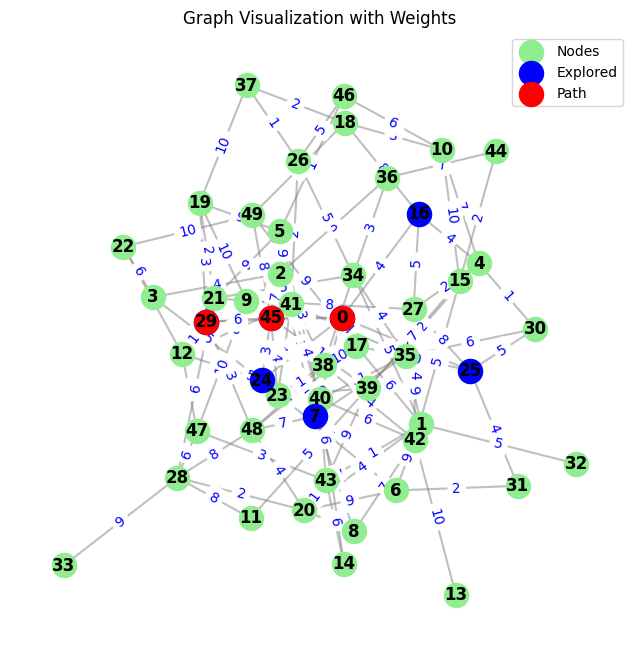

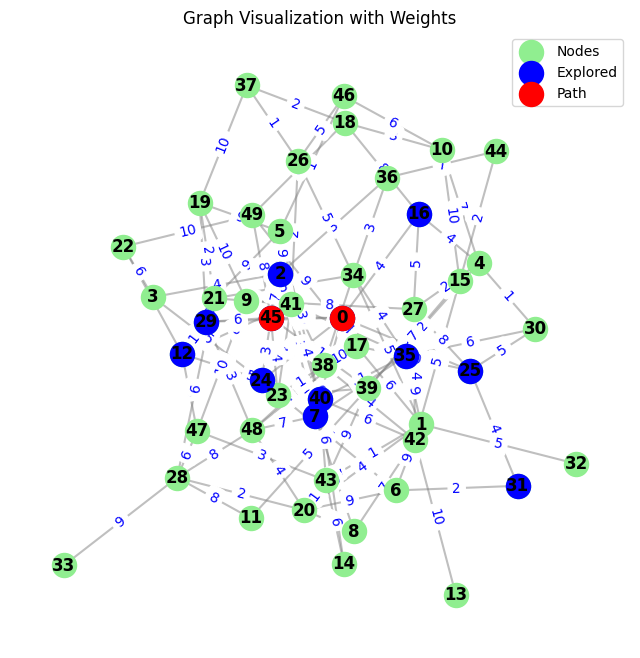

In [18]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

Your Answer:

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [24]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [5, 6, 1, 8, 8, 1, 7, 4, 6, 3, 8, 4, 1, 3, 8]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [25]:
def hill_climbing(nums, target_sum):
    #Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)
    #TODO Hill climbing
    #return a current solution = best state value
    #Hill climbing loop
    #Generate neighbors by adding one element or removing one element 
    #Evaluate the neighbors by calculating the sum
    #If no improvement, stop
    return current_solution



# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [26]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Single-point crossover
    #TODO randomly choose one point and do crossover on that
    #return childs created of process (child1 and child 2)
    return None

def mutate(solution, nums, mutation_rate=0.1):
    #TODO
    # Mutate the solution by either adding a random number from nums that isn't in solution or removing a random number from solution 
    #chanced are based on mutation_rate (when your chance is less that rate it will happen)
    #return the mutated solution.
    return solution




In [27]:
def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]
    #TODO perform Genetic algorithm
    # Sort the population by fitness and select the best solution; if it matches the target, return it.
    # Use tournament selection, crossover, and mutation to create the next generation until the population size is met.
    return population[0]  # Return the best solution after all generations

# Brute Force

In [28]:
def brute_force(nums, target_sum):
    #TODO check all possible combinations and return the best subset
    return None


# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [29]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 30))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 64, Numbers = [3, 9, 1, 6, 5, 2, 3, 1, 6, 3, 7, 6, 4, 2, 7, 10, 3, 5, 5, 9, 10, 5, 4, 1, 7, 4, 5, 2, 2, 1]
Hill Climbing Result: [2, 3, 5, 5, 4, 5, 5, 3, 4, 1, 2, 10, 2, 3, 7], final sum: 61, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [3, 6, 1, 3, 5, 10, 3, 2, 2, 5, 7, 2, 9, 6], final sum: 64, Time Taken: 0.0010 seconds
Brute Force Result: [9, 6, 6, 7, 7, 10, 9, 10], final sum: 64, Time Taken: 0.9084 seconds

Trial 2: Target Sum = 52, Numbers = [9, 2, 10, 3, 7, 9, 3, 2, 3, 1, 5, 10, 3, 7, 2, 10, 3, 10, 4, 6, 4, 8, 6, 1, 3, 9]
Hill Climbing Result: [3, 10, 3, 6, 3, 10, 9, 3, 4, 1], final sum: 52, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [7, 2, 10, 10, 3, 3, 8, 9], final sum: 52, Time Taken: 0.0000 seconds
Brute Force Result: [9, 10, 3, 10, 10, 10], final sum: 52, Time Taken: 0.0152 seconds

Trial 3: Target Sum = 99, Numbers = [3, 3, 8, 6, 4, 4, 5, 8, 9, 7, 2, 9, 7, 7, 7, 2]
Hill Climbing Result: [4, 6, 3, 7, 2], final sum: 22, Time Taken: 0.00

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


Your Answer: